# How cleanly are different spectral categories separated in the WHAV* diagram? Can we come up with clean dividing lines that can be used for reliable spectral classification based only on the H$\alpha$ EW and $\sigma_{\rm gas} - \sigma_*$?
---
Like Lisa suggested: given a set of boundaries in the WHAV* diagram, what % of BPT-classified star-forming spaxels lie within those boundaries, etc.? 

In here:
1. Recreate Fig. 15 from the paper draft, but with each spectral classification shown separately (classification based on *total* emission line fluxes)
2. Repeat the above, but with the emission line fluxes from *individual components*. Idea: put all 3 components in 1 diagram to make larger samples. 

In [4]:
# Imports
import sys
import os 
import numpy as np
import pandas as pd
from astropy.visualization import hist

from spaxelsleuth.loaddata.lzifu import load_lzifu_galaxies
from spaxelsleuth.loaddata.sami import load_sami_galaxies
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram
from spaxelsleuth.plotting.plottools import vmin_fn, vmax_fn, label_fn, cmap_fn
from spaxelsleuth.plotting.plottools import bpt_colours, bpt_labels, bpt_ticks
from spaxelsleuth.plotting.plottools import morph_labels, morph_ticks
from spaxelsleuth.plotting.plottools import ncomponents_labels, ncomponents_colours
from spaxelsleuth.plotting.plottools import component_labels, component_colours
from spaxelsleuth.plotting.plotgalaxies import plot2dhistcontours, plot2dscatter, plot2dcontours

import matplotlib
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 14})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


In [2]:
# Options
fig_path = "/priv/meggs3/u5708159/SAMI/figs/full_sample/"
savefigs = False
bin_type = "default"    # Options: "default" or "adaptive" for Voronoi binning
ncomponents = "recom"   # Options: "1" or "recom"
eline_SNR_min = 5       # Minimum S/N of emission lines to accept


In [3]:
# Load the sample
df = load_sami_galaxies(ncomponents=ncomponents,
                        bin_type=bin_type,
                        eline_SNR_min=eline_SNR_min, 
                        vgrad_cut=False,
                        correct_extinction=False,
                        sigma_gas_SNR_cut=True)

/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc,

In [57]:
# Load the LZIFU galaxies
df_lzifu = load_lzifu_galaxies(ncomponents=ncomponents,
                              bin_type=bin_type,
                              eline_SNR_min=eline_SNR_min, 
                              vgrad_cut=False,
                              correct_extinction=False,
                              sigma_gas_SNR_cut=True)        


Loading LZIFU DataFrame for all galaxies in the LZIFU subsample...


/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [22]:
# Plot settings
col_x = "sigma_gas - sigma_*"
col_y = "log HALPHA EW"
nbins = 100

# Spectral categories
cats = ["SF", "Composite", "Ambiguous", "Seyfert", "LINER", "Not classified"]


## Classification based on *total* fluxes: WHAV* diagrams
---

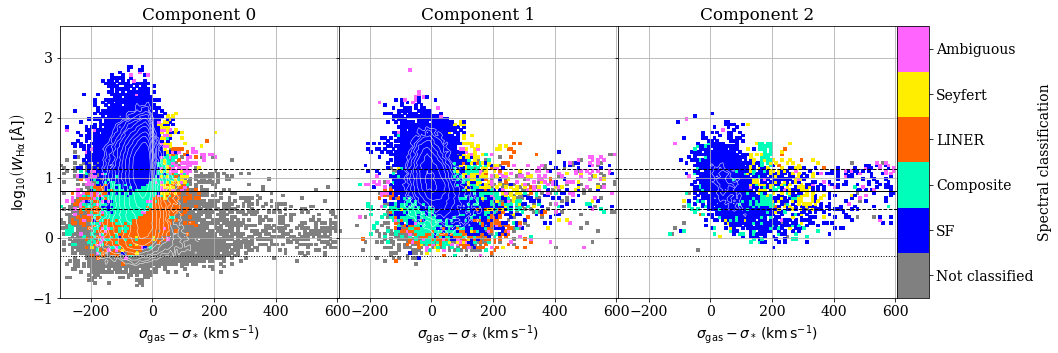

In [8]:
###############################################################################
# WHAV diagram (hist) - spectral classification (all together)
###############################################################################
col_z = "BPT (numeric) (total)"

# Create figure
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

# recom components
for ii in range(3):
    plot2dhistcontours(df, col_x=f"{col_x} (component {ii})",
                          col_y=f"{col_y} (component {ii})",
                          col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})" in df else col_z,
                          alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                          linewidths=0.5,
                          contours=True, hist=True, colors="white",
                          plot_colorbar=True if ii == 3 - 1 else False)
    # Decorations
    axs[ii].grid()
    axs[ii].set_ylabel("") if ii > 0 else None
    axs[ii].set_yticklabels([]) if ii > 0 else None
    axs[ii].set_title(component_labels[ii])
        

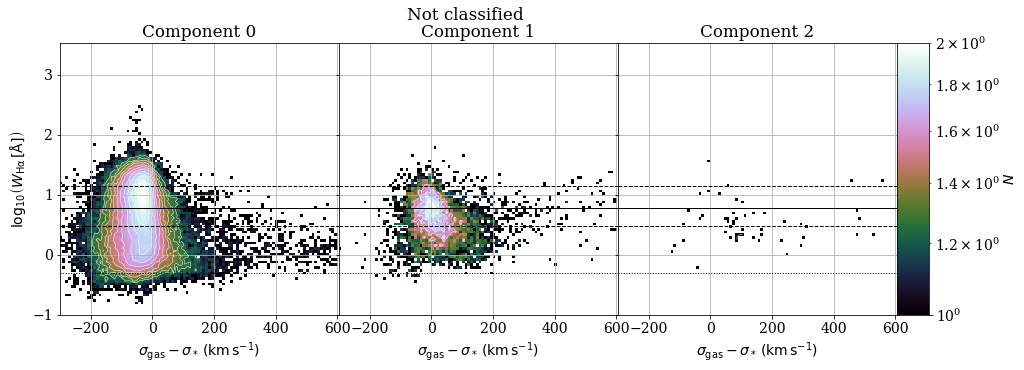

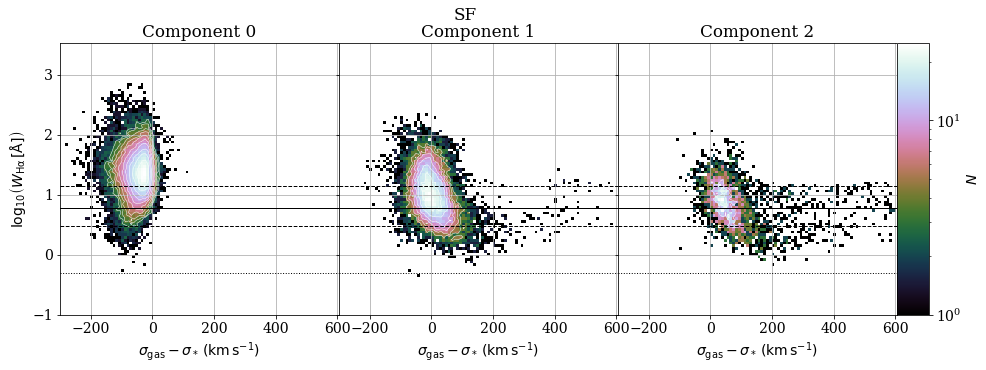

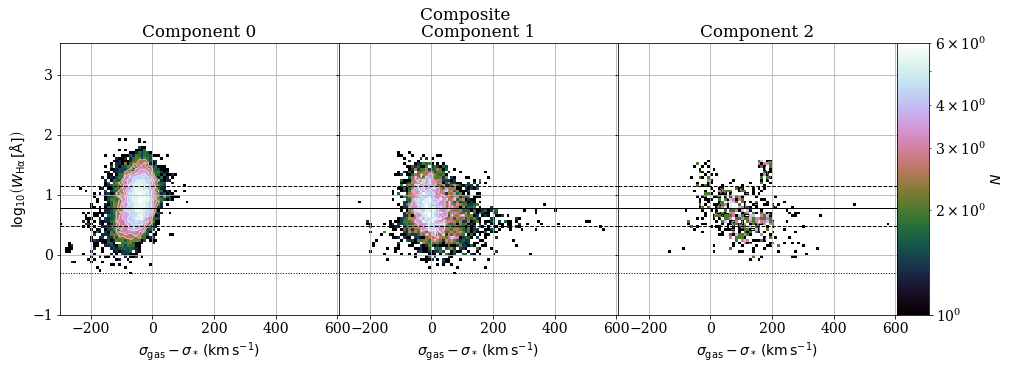

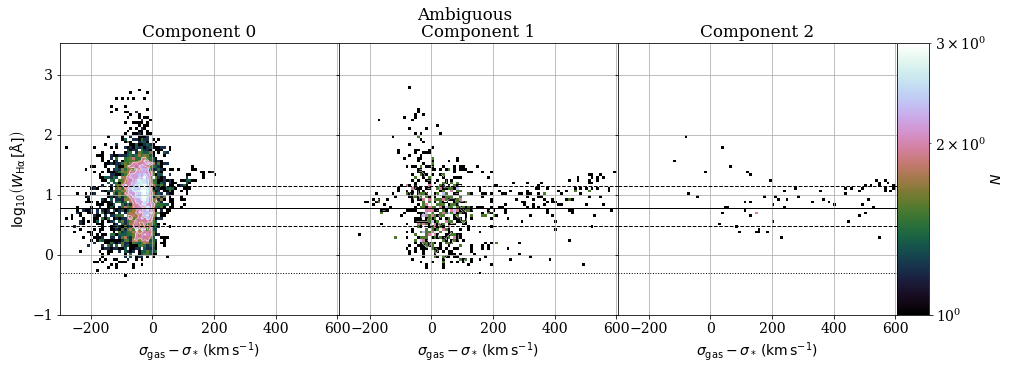

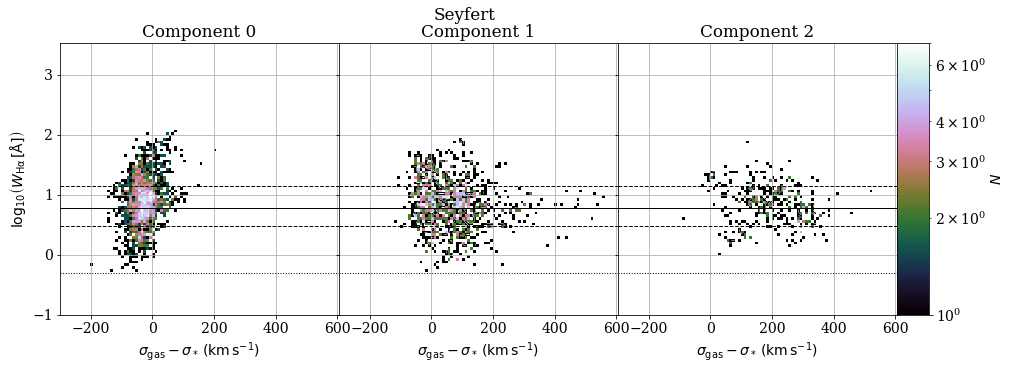

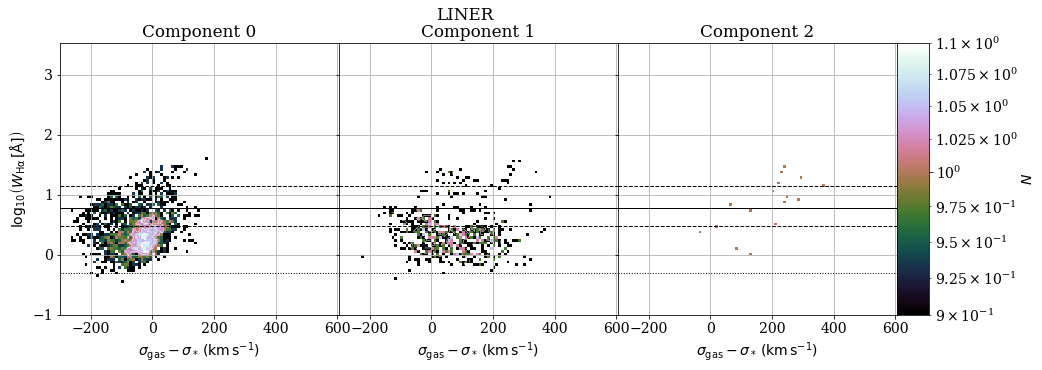

In [13]:
###############################################################################
# WHAV diagram (hist) - spectral classification (individually)
###############################################################################
for cat in cats:
    df_subset = df.loc[df["BPT (total)"] == cat]
    
    # Create figure
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
    fig.subplots_adjust(wspace=0)
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        plot2dhistcontours(df_subset, 
                           col_x=f"{col_x} (component {ii})",
                           col_y=f"{col_y} (component {ii})",
                           col_z="count", log_z=True,
                           alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                           linewidths=0.5,
                           contours=True, hist=True, colors="white",
                           plot_colorbar=True if ii == 3 - 1 else False)
        # Decorations
        axs[ii].grid()
        axs[ii].set_ylabel("") if ii > 0 else None
        axs[ii].set_yticklabels([]) if ii > 0 else None
        axs[ii].set_title(component_labels[ii])
        fig.suptitle(cat)


## Classification based on *individual* fluxes: WHAV* diagrams
---

/home/u5708159/python/Modules/spaxelsleuth/plotting/plotgalaxies.py:177: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths)


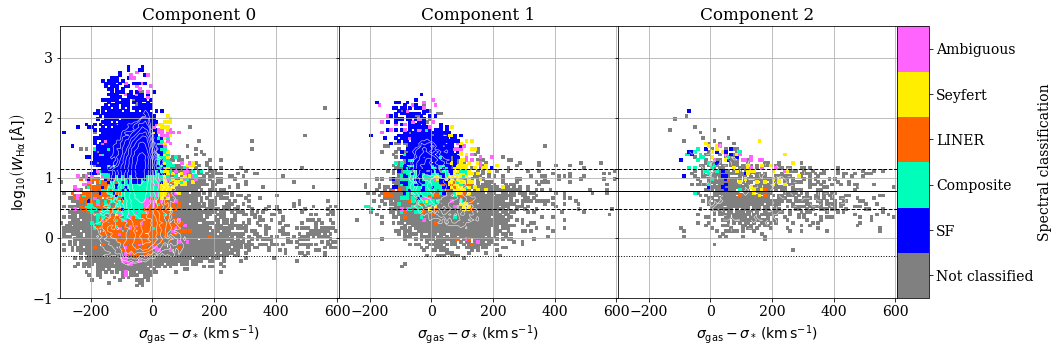

In [9]:
###############################################################################
# WHAV diagram (hist) - spectral classification
###############################################################################
col_z = "BPT (numeric)"

# Create figure
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
fig.subplots_adjust(wspace=0)
bbox = axs[-1].get_position()
cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

# recom components
for ii in range(3):
    plot2dhistcontours(df_lzifu, col_x=f"{col_x} (component {ii})",
                          col_y=f"{col_y} (component {ii})",
                          col_z=f"{col_z} (component {ii})" if f"{col_z} (component {ii})" in df_lzifu else col_z,
                          alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                          linewidths=0.5,
                          contours=True, hist=True, colors="white",
                          plot_colorbar=True if ii == 3 - 1 else False)
    
    # Decorations
    axs[ii].grid()
    axs[ii].set_ylabel("") if ii > 0 else None
    axs[ii].set_yticklabels([]) if ii > 0 else None
    axs[ii].set_title(component_labels[ii])
        

/home/u5708159/python/Modules/spaxelsleuth/plotting/plotgalaxies.py:177: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths)
/pkg/linux/anaconda-20191122/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


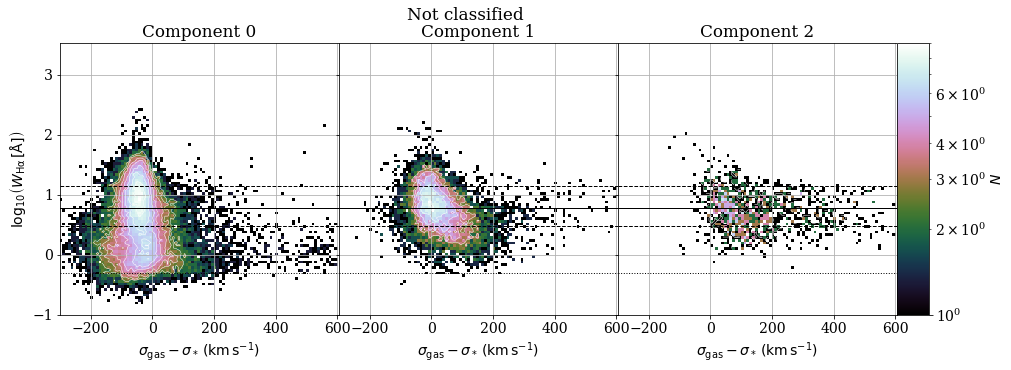

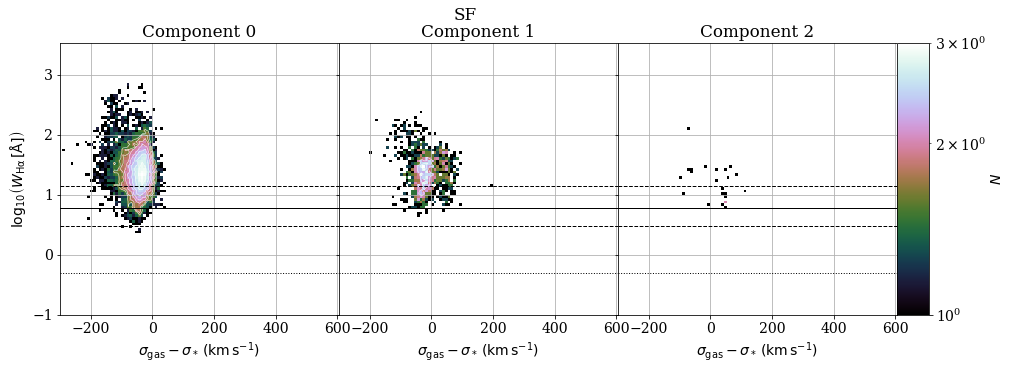

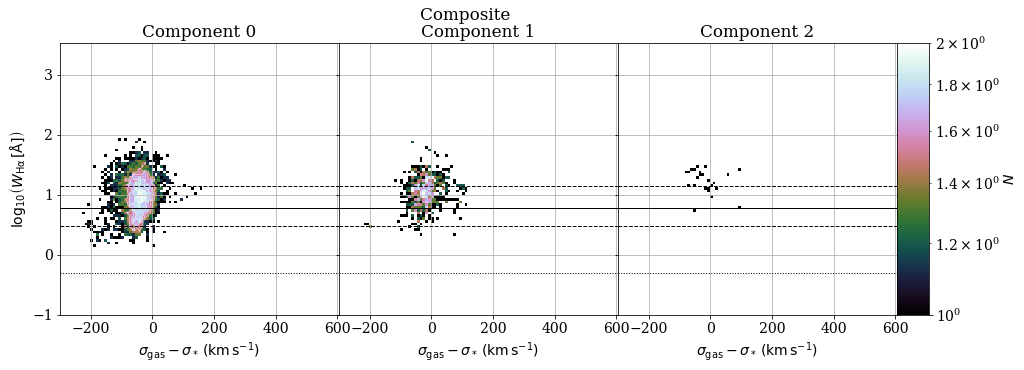

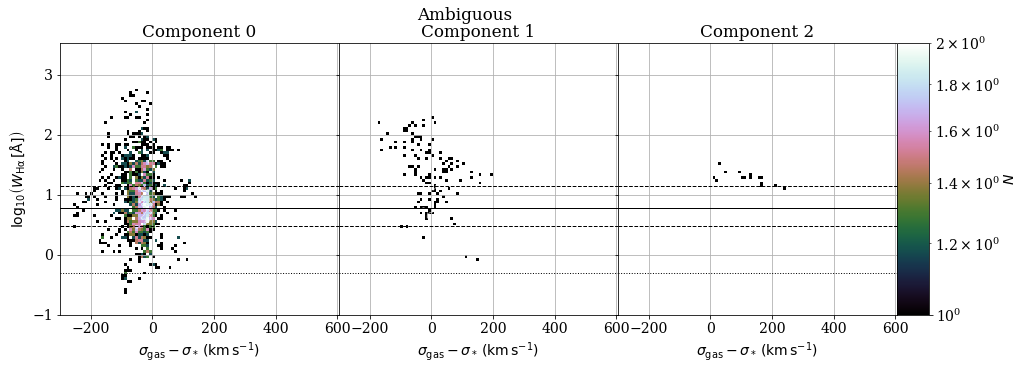

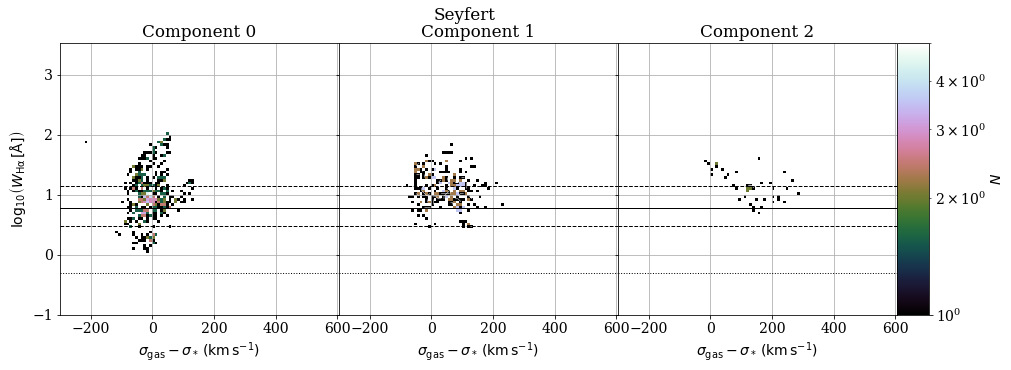

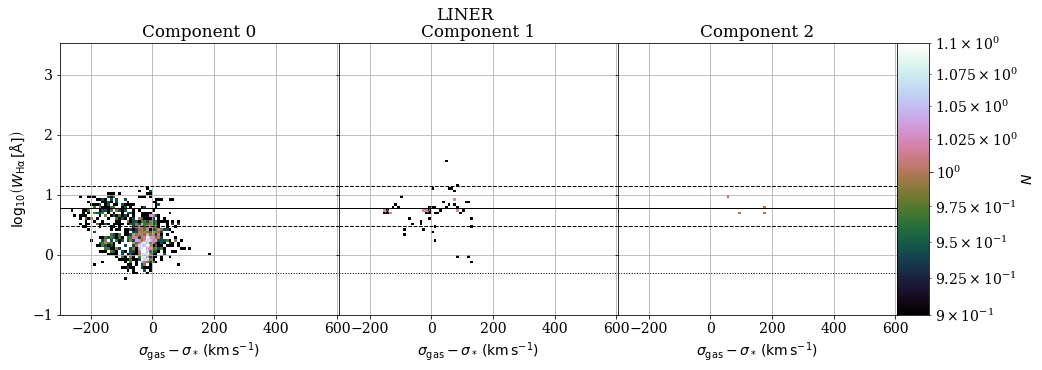

In [20]:
###############################################################################
# WHAV diagram (hist) - spectral classification (individually)
###############################################################################

for cat in cats:
    
    # Create figure
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5 * 3, 5))
    fig.subplots_adjust(wspace=0)
    bbox = axs[-1].get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.03, bbox.height])

    # recom components
    for ii in range(3):
        df_subset = df_lzifu.loc[df_lzifu[f"BPT (component {ii})"] == cat]
        if df_subset.shape[0] > 0:
            plot2dhistcontours(df_subset, 
                               col_x=f"{col_x} (component {ii})",
                               col_y=f"{col_y} (component {ii})",
                               col_z="count", log_z=True,
                               alpha=1.0, ax=axs[ii], cax=cax, nbins=nbins,
                               linewidths=0.5,
                               contours=True, hist=True, colors="white",
                               plot_colorbar=True if ii == 3 - 1 else False)
            # Decorations
            axs[ii].grid()
            axs[ii].set_ylabel("") if ii > 0 else None
            axs[ii].set_yticklabels([]) if ii > 0 else None
            axs[ii].set_title(component_labels[ii])
            fig.suptitle(cat)


In [96]:
# Need to merge data sets 
df_subset = None
for ii in [0, 1, 2]:
    df_this_component = df_lzifu.loc[df_lzifu[f"BPT (component {ii})"] == cat]

    # Drop all columns that are NOT this component
    other_components = [cc for cc in [0, 1, 2] if cc != ii]
    cols_to_drop = [c for c in df_this_component.columns if f"(total)" in c]
    for cc in [1, 2]:
        cols_to_drop += [c for c in df_this_component.columns if f"(component {cc})" in c]
    df_this_component = df_this_component.drop(columns=cols_to_drop)

    # Rename columns to have suffix "component 0"
    if ii != 0:
        cols_to_rename = [c for c in df_this_component.columns if c.endswith(f"(component {ii})")]
        new_col_names = [c.split(f"(component {ii})")[0] + "(component 0)" for c in cols_to_rename]
        rename_dict = dict(zip(cols_to_rename, new_col_names))
        df_this_component = df_this_component.rename(columns=rename_dict)

    # Merge 
    if df_subset is None:
        df_subset = df_this_component.copy()
    else:
        df_subset = df_subset.append(df_this_component)


In [99]:
df_subset["HALPHA (total)"]

KeyError: 'HALPHA (total)'

In [82]:
df_lzifu.loc[df_lzifu[f"BPT (component {ii})"] == cat]["HBETA (component 0)"]

128       0.140413
287       0.824932
2100      0.141555
2260      0.120433
2845      0.177227
            ...   
100509    0.271658
100512    0.410429
100559    0.429999
100562    0.798993
100708    1.516868
Name: HBETA (component 0), Length: 25930, dtype: float64

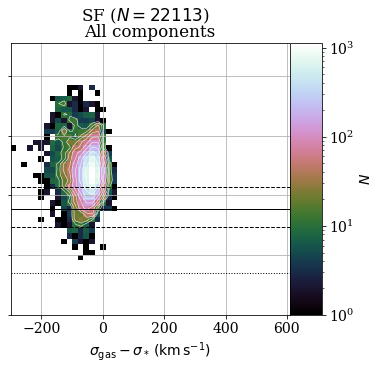

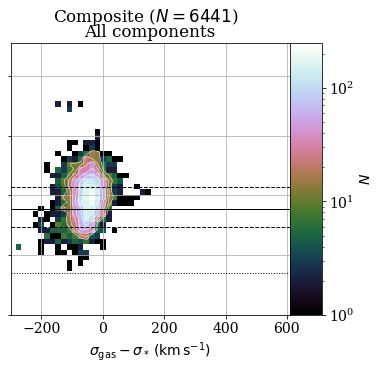

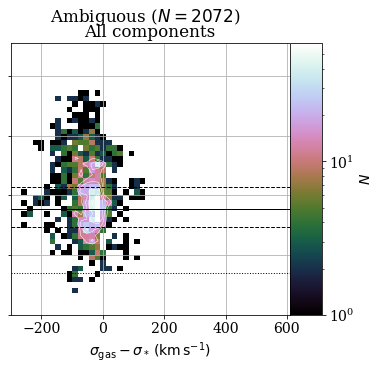

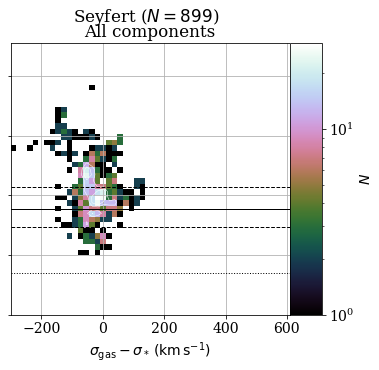

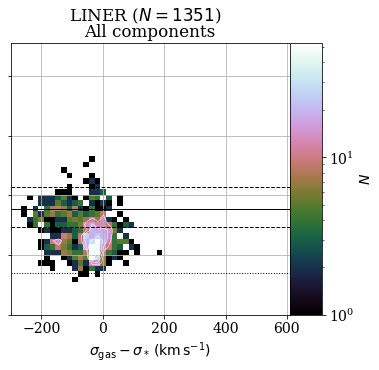

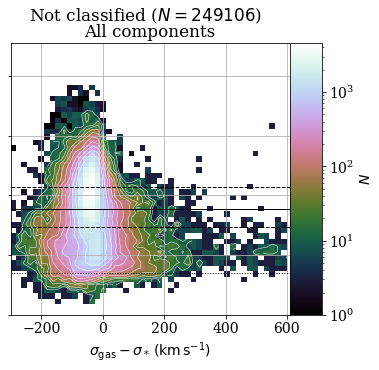

In [127]:
###############################################################################
# WHAV diagram (hist) - spectral classification (individually), all shown on 
# the SAME diagram
###############################################################################
nbins = 50
for cat in cats:
    
    # Create figure
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    fig.subplots_adjust(wspace=0)
    bbox = ax.get_position()
    cax = fig.add_axes([bbox.x0 + bbox.width, bbox.y0, 0.09, bbox.height])

    df_subset = None
    for ii in [0, 1, 2]:
        df_this_component = df_lzifu.loc[df_lzifu[f"BPT (component {ii})"] == cat]

        # Drop all columns that are NOT this component
        other_components = [cc for cc in [0, 1, 2] if cc != ii]
        cols_to_drop = [c for c in df_this_component.columns if f"(total)" in c]
        for cc in [1, 2]:
            cols_to_drop += [c for c in df_this_component.columns if f"(component {cc})" in c]
        df_this_component = df_this_component.drop(columns=cols_to_drop)

        # Rename columns to have suffix "component 0"
        if ii != 0:
            cols_to_rename = [c for c in df_this_component.columns if c.endswith(f"(component {ii})")]
            new_col_names = [c.split(f"(component {ii})")[0] + "(component 0)" for c in cols_to_rename]
            rename_dict = dict(zip(cols_to_rename, new_col_names))
            df_this_component = df_this_component.rename(columns=rename_dict)

        # Merge 
        if df_subset is None:
            df_subset = df_this_component.copy()
        else:
            df_subset = df_subset.append(df_this_component)

        # Count how many valid data points we have 
        df_subset.loc[:, "Good?"] = ~df_subset[f"{col_x} (component 0)"].isna() & ~df_subset[f"{col_y} (component 0)"].isna()
        cond = df_subset["Good?"] == 1.0
        df_subset = df_subset[cond]
            
    # Plot
    if df_subset.shape[0] > 0:
        plot2dhistcontours(df_subset, 
                           col_x=f"{col_x} (component 0)",
                           col_y=f"{col_y} (component 0)",
                           col_z="count", log_z=True,
                           alpha=1.0, ax=ax, cax=cax, nbins=nbins,
                           linewidths=0.5,
                           contours=True, hist=True, colors="white",
                           plot_colorbar=True)

    # Decorations
    ax.grid()
    ax.set_ylabel("") if ii > 0 else None
    ax.set_yticklabels([]) if ii > 0 else None
    ax.set_title("All components")
    fig.suptitle(f"{cat} " + r"($N = %d$)" % df_subset.shape[0])


In [126]:
df_subset["Good?"]

128       False
287       False
2100       True
2260       True
2845      False
          ...  
100509     True
100512     True
100559     True
100562     True
100708     True
Name: Good?, Length: 25930, dtype: bool

In [119]:
~df_subset[f"{col_x} (component 0)"].isna() & ~df_subset[f"{col_y} (component 0)"].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
119409     True
269305     True
269369     True
269461     True
259083     True
Length: 1471089, dtype: bool

In [107]:
df_subset.loc["Good?"] = ~np.isnan(df_subset.loc[f"{col_x} (component 0)"]) and ~np.isnan(df_subset.loc[f"{col_y} (component 0)"])


KeyError: 'sigma_gas - sigma_* (component 0)'

### Find the 1-component spaxels & merge these with LZIFU? 